# Discovering interpretable features
> In this chapter, you'll learn about a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history! 

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 4 exercises "Unsupervised Learning in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Non-negative matrix factorization (NMF)


NMF stands for "non-negative matrix factorization". NMF, like PCA, is a dimension reduction technique. In constract to PCA, however, NMF models are interpretable. This means an NMF models are easier to understand yourself, and much easier for you to explain to others. NMF can not be applied to every dataset, however. It is required that the sample features be "non-negative", so greater than or equal to 0.

### Non-negative data


<div class=""><p>Which of the following 2-dimensional arrays are examples of non-negative data?</p>
<ol>
<li>A tf-idf word-frequency array.</li>
<li>An array daily stock market price movements (up and down), where each row represents a company.</li>
<li>An array where rows are customers, columns are products and entries are 0 or 1, indicating whether a customer has purchased a product.</li>
</ol></div>

**Stock prices can go down as well as up, so an array of daily stock market price movements is not an example of non-negative data.**

### NMF applied to Wikipedia articles


<p>In the video, you saw NMF applied to transform a toy word-frequency array.  Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix <code>articles</code>.  Here, fit the model and transform the articles.  In the next exercise, you'll explore the result.</p>

In [3]:
from scipy.sparse import csc_matrix

df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/2-unsupervised-learning-in-python/datasets/wikipedia-vectors.csv', index_col=0)
articles = csc_matrix(df.transpose())
titles = list(df.columns)

Instructions
<ul>
<li>Import <code>NMF</code> from <code>sklearn.decomposition</code>.</li>
<li>Create an <code>NMF</code> instance called <code>model</code> with <code>6</code> components.</li>
<li>Fit the model to the word count data <code>articles</code>.</li>
<li>Use the <code>.transform()</code> method of <code>model</code> to transform <code>articles</code>, and assign the result to <code>nmf_features</code>.</li>
<li>Print <code>nmf_features</code> to get a first idea what it looks like (<code>.round(2)</code> rounds the entries to 2 decimal places.)</li>
</ul>

In [39]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.57]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.49]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.36 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.38 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.47 0.   0.   0.  ]
 [0.   0.01 0.02 0.52 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.44 0.   0.  ]
 [0.   0.   0.   0.5  0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.58 0.   0.  ]
 [0.   0.   0.   0.53 0.01 0.01]
 [0.   0.4

**let's explore the meaning of these features in the next exercise!**

### NMF features of the Wikipedia articles


<div class=""><p>Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array <code>nmf_features</code> is available.  Also available is a list <code>titles</code> giving the title of each Wikipedia article.</p>
<p>When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value.  This means that both articles are reconstructed using mainly the 3rd NMF component.  In the next video, you'll see why: NMF components represent topics (for instance, acting!).</p></div>

Instructions
<ul>
<li>Import <code>pandas</code> as <code>pd</code>.</li>
<li>Create a DataFrame <code>df</code> from <code>nmf_features</code> using <code>pd.DataFrame()</code>. Set the index to <code>titles</code> using <code>index=titles</code>.</li>
<li>Use the <code>.loc[]</code> accessor of <code>df</code> to select the row with title <code>'Anne Hathaway'</code>, and print the result.  These are the NMF features for the article about the actress Anne Hathaway.</li>
<li>Repeat the last step for <code>'Denzel Washington'</code> (another actor).</li>
</ul>

In [40]:
# Create a pandas DataFrame: df
df = pd.DataFrame(data = nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003845
1    0.000000
2    0.000000
3    0.575627
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422319
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


**Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).**

### NMF reconstructs samples


<p>In this exercise, you'll check your understanding of how NMF reconstructs samples from its components using the NMF feature values.  On the right are the components of an NMF model.  If the NMF feature values of a sample are <code>[2, 1]</code>, then which of the following is <em>most likely</em> to represent the original sample? A pen and paper will help here! You have to apply the same technique Ben used in the video to reconstruct the sample <code>[0.1203 0.1764 0.3195 0.141]</code>.</p>

<pre>
Possible Answers

<b>[2.2, 1.1, 2.1].</b>

[0.5, 1.6, 3.1].

[-4.0, 1.0, -2.0].

</pre>

In [22]:
features = np.array([2, 1])
components = np.array([[1. , 0.5, 0. ],
                       [0.2, 0.1, 2.1]])
sum(features.reshape(-1, 1) * components)

array([2.2, 1.1, 2.1])

## NMF learns interpretable parts


### NMF learns topics of documents


<div class=""><p>In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles.  Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.</p>
<p>The NMF model you built earlier is available as <code>model</code>, while <code>words</code> is a list of the words that label the columns of the word-frequency array.</p>
<p>After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common!</p></div>

In [44]:
!wget https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/2-unsupervised-learning-in-python/datasets/wikipedia-vocabulary-utf8.txt
words = open('/content/wikipedia-vocabulary-utf8.txt').read().splitlines()

--2021-01-27 22:43:44--  https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/2-unsupervised-learning-in-python/datasets/wikipedia-vocabulary-utf8.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110631 (108K) [text/plain]
Saving to: ‘wikipedia-vocabulary-utf8.txt’

wikipedia-vocabular 100%[===================>] 108.04K  --.-KB/s    in 0.02s   

2021-01-27 22:43:44 (4.22 MB/s) - ‘wikipedia-vocabulary-utf8.txt’ saved [110631/110631]



Instructions
<ul>
<li>Import <code>pandas</code> as <code>pd</code>.</li>
<li>Create a DataFrame <code>components_df</code> from <code>model.components_</code>, setting <code>columns=words</code> so that columns are labeled by the words.</li>
<li>Print <code>components_df.shape</code> to check the dimensions of the DataFrame.</li>
<li>Use the <code>.iloc[]</code> accessor on the DataFrame <code>components_df</code> to select row <code>3</code>. Assign the result to <code>component</code>.</li>
<li>Call the <code>.nlargest()</code> method of <code>component</code>, and print the result.  This gives the five words with the highest values for that component.</li>
</ul>

In [45]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.627967
award      0.253168
starred    0.245320
role       0.211481
actress    0.186425
Name: 3, dtype: float64


**Take a moment to recognise the topics that the articles about Anne Hathaway and Denzel Washington have in common!**

### Explore the LED digits dataset


<p>In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns.  Firstly, explore the image dataset and see how it is encoded as an array.  You are given 100 images as a 2D array <code>samples</code>, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.</p>

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/2-unsupervised-learning-in-python/datasets/digits_df.csv')
samples = df.values

Instructions
<ul>
<li>Import <code>matplotlib.pyplot</code> as <code>plt</code>.</li>
<li>Select row <code>0</code> of <code>samples</code> and assign the result to <code>digit</code>. For example, to select column <code>2</code> of an array <code>a</code>, you could use <code>a[:,2]</code>. Remember that since <code>samples</code> is a NumPy array, you can't use the <code>.loc[]</code> or <code>iloc[]</code> accessors to select specific rows or columns.</li>
<li>Print <code>digit</code>. This has been done for you. Notice that it is a 1D array of 0s and 1s.</li>
<li>Use the <code>.reshape()</code> method of <code>digit</code> to get a 2D array with shape <code>(13, 8)</code>. Assign the result to <code>bitmap</code>.</li>
<li>Print <code>bitmap</code>, and notice that the 1s show the digit 7!</li>
<li>Use the <code>plt.imshow()</code> function to display <code>bitmap</code> as an image.</li>
</ul>

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


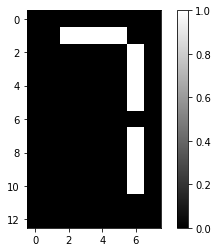

In [53]:
# Select the 0th row: digit
digit = samples[0]
# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13, 8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

**You'll explore this dataset further in the next exercise and see for yourself how NMF can learn the parts of images.**

### NMF learns the parts of images


<div class=""><p>Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array <code>samples</code>. This time, you are also provided with a function <code>show_as_image()</code> that displays the image encoded by any 1D array:</p>
<pre><code>def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
</code></pre>
<p>After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!</p></div>

In [54]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

Instructions
<ul>
<li>Import <code>NMF</code> from <code>sklearn.decomposition</code>.</li>
<li>Create an <code>NMF</code> instance called <code>model</code> with <code>7</code> components. (7 is the number of cells in an LED display).</li>
<li>Apply the <code>.fit_transform()</code> method of <code>model</code> to <code>samples</code>. Assign the result to <code>features</code>.</li>
<li>To each component of the model (accessed via <code>model.components_</code>), apply the <code>show_as_image()</code> function to that component inside the loop.</li>
<li>Assign the row <code>0</code> of <code>features</code> to <code>digit_features</code>.</li>
<li>Print <code>digit_features</code>.</li>
</ul>

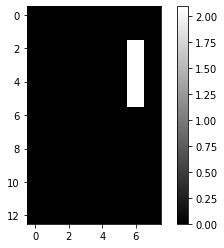

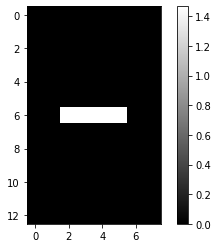

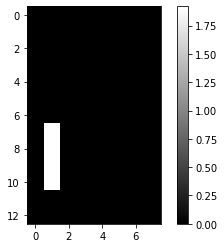

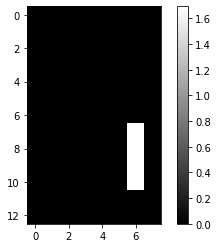

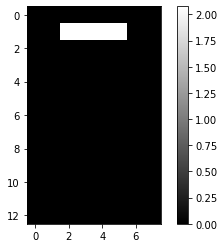

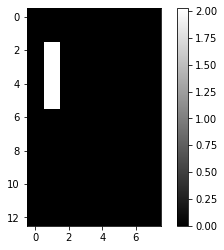

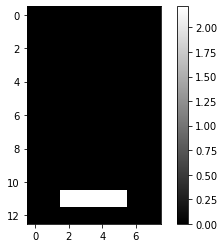

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37546142e-16]


In [55]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

**Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!**

### PCA doesn't learn parts


<div class=""><p>Unlike NMF, PCA <em>doesn't</em> learn the parts of things.  Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images.  Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise.  The images are available as a 2D array <code>samples</code>.  Also available is a modified version of the <code>show_as_image()</code> function which colors a pixel red if the value is negative.</p>
<p>After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!</p></div>

In [57]:
def show_as_image(vector):
    """
    Given a 1d vector representing an image, display that image in 
    black and white.  If there are negative values, then use red for 
    that pixel.
    """
    bitmap = vector.reshape((13, 8))  # make a square array
    bitmap /= np.abs(vector).max()  # normalise
    bitmap = bitmap[:,:,np.newaxis]
    rgb_layers = [np.abs(bitmap)] + [bitmap.clip(0)] * 2
    rgb_bitmap = np.concatenate(rgb_layers, axis=-1)
    plt.imshow(rgb_bitmap, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

Instructions
<ul>
<li>Import <code>PCA</code> from <code>sklearn.decomposition</code>.</li>
<li>Create a <code>PCA</code> instance called <code>model</code> with <code>7</code> components. </li>
<li>Apply the <code>.fit_transform()</code> method of <code>model</code> to <code>samples</code>. Assign the result to <code>features</code>.</li>
<li>To each component of the model (accessed via <code>model.components_</code>), apply the <code>show_as_image()</code> function to that component inside the loop.</li>
</ul>

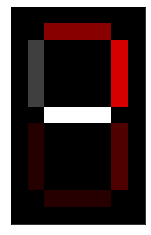

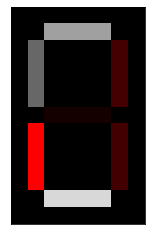

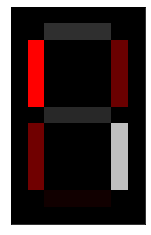

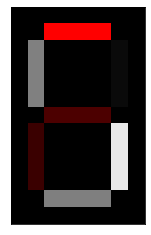

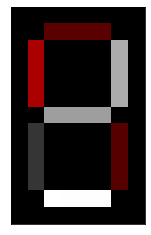

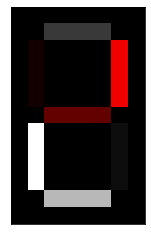

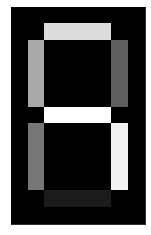

In [59]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

**Notice that the components of PCA do not represent meaningful parts of images of LED digits!**

## Building recommender systems using NMF


## Which articles are similar to 'Cristiano Ronaldo'?


<p>In the video, you learned how to use NMF features and the cosine similarity to find similar articles.
Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo.  The NMF features you obtained earlier are available as <code>nmf_features</code>, while <code>titles</code> is a list of the article titles.</p>

Instructions
<ul>
<li>Import <code>normalize</code> from <code>sklearn.preprocessing</code>.</li>
<li>Apply the <code>normalize()</code> function to <code>nmf_features</code>. Store the result as <code>norm_features</code>.</li>
<li>Create a DataFrame <code>df</code> from <code>norm_features</code>, using <code>titles</code> as an index.</li>
<li>Use the <code>.loc[]</code> accessor of <code>df</code> to select the row of <code>'Cristiano Ronaldo'</code>. Assign the result to <code>article</code>. </li>
<li>Apply the <code>.dot()</code> method of <code>df</code> to <code>article</code> to calculate the cosine similarity of every row with <code>article</code>.</li>
<li>Print the result of the <code>.nlargest()</code> method of <code>similarities</code> to display the most similiar articles. This has been done for you, so hit 'Submit Answer' to see the result!</li>
</ul>

In [60]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


**Although you may need to know a little about football (or soccer, depending on where you're from!) to be able to evaluate for yourself the quality of the computed similarities!**

### Recommend musical artists part I


<div class=""><p>In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array <code>artists</code> whose rows correspond to artists and whose columns correspond to users.  The entries give the number of times each artist was listened to by each user.</p>
<p>In this exercise, build a pipeline and transform the array into normalized NMF features.  The first step in the pipeline, <code>MaxAbsScaler</code>, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to.  In the next exercise, you'll use the resulting normalized NMF features for recommendation!</p></div>

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/2-unsupervised-learning-in-python/datasets/scrobbler-small-sample.csv')

In [83]:
from scipy.sparse import coo_matrix
artists1 = df.sort_values(['artist_offset', 'user_offset'], ascending=[True, True])
row_ind = artists1['artist_offset'].values
col_ind = artists1['user_offset'].values
data1 = artists1['playcount'].values
artists = coo_matrix((data1, (row_ind, col_ind)))

In [94]:
data = df['playcount'].values
row = df['artist_offset'].values
col = df['user_offset'].values
artists5 = coo_matrix((data, (row, col)))
#((data, (row, col)), shape=(4, 4)).toarray()

In [95]:
artists5

<111x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2894 stored elements in COOrdinate format>

Instructions
<ul>
<li>Import:<ul>
<li><code>NMF</code> from <code>sklearn.decomposition</code>.</li>
<li><code>Normalizer</code> and <code>MaxAbsScaler</code> from <code>sklearn.preprocessing</code>.</li>
<li><code>make_pipeline</code> from <code>sklearn.pipeline</code>.</li></ul></li>
<li>Create an instance of <code>MaxAbsScaler</code> called <code>scaler</code>.</li>
<li>Create an <code>NMF</code> instance with <code>20</code> components called <code>nmf</code>.</li>
<li>Create an instance of <code>Normalizer</code> called <code>normalizer</code>.</li>
<li>Create a pipeline called <code>pipeline</code> that chains together <code>scaler</code>, <code>nmf</code>, and <code>normalizer</code>.</li>
<li>Apply the <code>.fit_transform()</code> method of <code>pipeline</code> to <code>artists</code>. Assign the result to <code>norm_features</code>.</li>
</ul>

In [96]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

**now that you've computed the normalized NMF features, you'll use them in the next exercise to recommend musical artists!**

### Recommend musical artists part II


<p>Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like?  Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists.  A solution to the previous exercise has been run, so <code>norm_features</code> is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list <code>artist_names</code>.</p>

In [116]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/2-unsupervised-learning-in-python/datasets/artists.csv', header=None)
artist_names = df.values.reshape(111).tolist()

Instructions
<ul>
<li>Import <code>pandas</code> as <code>pd</code>.</li>
<li>Create a DataFrame <code>df</code> from <code>norm_features</code>, using <code>artist_names</code> as an index.</li>
<li>Use the <code>.loc[]</code> accessor of <code>df</code> to select the row of <code>'Bruce Springsteen'</code>. Assign the result to <code>artist</code>. </li>
<li>Apply the <code>.dot()</code> method of <code>df</code> to <code>artist</code> to calculate the dot product of every row with <code>artist</code>. Save the result as <code>similarities</code>.</li>
<li>Print the result of the <code>.nlargest()</code> method of <code>similarities</code> to display the artists most similar to <code>'Bruce Springsteen'</code>.</li>
</ul>

In [117]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.958082
Leonard Cohen        0.913661
Van Morrison         0.880586
Bob Dylan            0.862558
dtype: float64
